In [1]:
import mlflow

mlflow.set_tracking_uri("http://aiserver.tzp.haw-landshut.de:5050")
mlflow.set_experiment("RandomForestClassifier_paperd")

logged_model = 'runs:/b02828f973a2431e84889eadaccf8e02/randomForest'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# 1. Parse files

In [2]:
import os
import json
import re
import numpy as np

def parse_acceleration_data(folder_path):
    """
    Parses acceleration data from JSON files in a folder.

    Args:
        folder_path (str): Path to the folder containing the JSON files.

    Returns:
        Tuple[numpy.ndarray, numpy.ndarray]: A tuple containing the acceleration data and the labels.

    Raises:
        ValueError: If the JSON files do not contain acceleration data with the expected format
                    or if the labels cannot be extracted from the filenames.
    """
    file_names = [f for f in os.listdir(folder_path) if f.endswith('.json')]
    num_files = len(file_names)
    acceleration_data = np.empty((num_files, 40000, 3))
    labels = np.empty((num_files, 1), dtype=np.object)

    for i, file_name in enumerate(file_names):
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, 'r') as file:
            json_data = json.load(file)

        if 'x' not in json_data or 'y' not in json_data or 'z' not in json_data:
            raise ValueError(f'Acceleration data not found in {file_path}')

        x_values = json_data['y']
        y_values = json_data['x']
        z_values = json_data['z']

        if len(x_values) != 40000 or len(y_values) != 40000 or len(z_values) != 40000:
            raise ValueError(f'Acceleration data size mismatch in {file_path}')

        acceleration_data[i] = np.array([x_values, y_values, z_values]).T

        # Extract label from the filename using regular expressions
        match = re.search(r'_scenario_(.*?)\.json', file_name)
        if match is None:
            raise ValueError(f'Label extraction error in {file_path}')

        label = match.group(1)
        print(label)
        labels[i] = label

    return acceleration_data, labels


data = parse_acceleration_data("./woodenInsertData/20230525/")

In [3]:
folder_path = './20230615/'

try:
    acceleration_array, labels = parse_acceleration_data(folder_path)
    print(acceleration_array.shape)  # Output the shape of the acceleration array
    print(labels.shape)  # Output the shape of the labels array
except ValueError as e:
    print(f'Error: {e}')

/tmp/ipykernel_51951/2025586553.py:23: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = np.empty((num_files, 1), dtype=np.object)


walking
palletjack
palletjack
rollerconveyor
liftingandlowering
sacktrolley
rotatehorizontally
liftingandlowering


liftingandlowering
rotatehorizontally
rollerconveyor
walking
palletjack
palletjack
rollerconveyor
rotatehorizontally
movingtable
largeloadcarriertrolley
rotatehorizontally
rollerconveyor
idle
walking
movingtable
movingtable
idle
rotatehorizontally
largeloadcarriertrolley
walking
rollerconveyor
sacktrolley
idle
idle
rotatehorizontally
rotatehorizontally
largeloadcarriertrolley
palletjack
walking
palletjack
liftingandlowering
liftingandlowering
liftingandlowering
rollerconveyor
idle
largeloadcarriertrolley
sacktrolley
rollerconveyor
rollerconveyor
idle
movingtable
sacktrolley
walking
idle
palletjack
sacktrolley
rollerconveyor
palletjack
palletjack
rotatehorizontally
sacktrolley
liftingandlowering
rotatehorizontally
walking
liftingandlowering
walking
liftingandlowering
idle
movingtable
movingtable
idle
sacktrolley
movingtable
rotatehorizontally
movingtable
idle
sacktrolley
movingtable
largeloadcarriertrolley
largeloadcarriertrolley
palletjack
rotatehorizontally
liftingandlowering
rollerco

In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import time
import random
def getIndicesOfFirstOccurranceOfLabel(searchlabel:str, y):
    labels = np.unique(y)
    if searchlabel not in labels:
        raise Exception("invalid label", "available labels: ", labels)
    indices = []
    for idx, label in enumerate(y):
        if label[0] == searchlabel:
            indices.append(idx)
    return indices

def plotRandomDatapointsOfLabel(searchLabel, X, y, type="line", axis=["z"]):
    plt.rcParams["figure.figsize"] = (20, 3)
    #searchLabel = "Gehen"
    
    indices = getIndicesOfFirstOccurranceOfLabel(searchLabel,y)
    randomIndex = random.randint(0, len(indices)-1)
    #randomIndex = indices[3]
    print(y[indices[randomIndex]], "Anzahl Aufnahmen: ", len(indices))
    if type=="line":
        plt.plot(X[indices[randomIndex]][:,0:3])
        plt.ylabel("Beschleunigung in g")
        plt.xlabel("Anzahl der Datenpunkte")
    plt.show()
    plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

def plotDatapointsViaIndicesOfLabel(X, y, indices, type="line", axis=["z"]):
    plt.rcParams["figure.figsize"] = (20, 3)
    #searchLabel = "Gehen"
    
    for index in indices:
    #randomIndex = indices[3]
        print("index: ", index, "label: ", y[index])#print(y[indices[index]], "Anzahl Aufnahmen: ", len(indices))
        if type=="line":
            plt.plot(X[index])
            plt.ylabel("Beschleunigung in g")
            plt.xlabel("Anzahl der Datenpunkte")
        plt.show()
    plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

def plotRandomDatapointsOfEachLabel(X, y, type="line", axis=["z"]):
    labels = np.unique(y)
    for label in labels:
        plotRandomDatapointsOfLabel(label, X, y, type)

In [5]:
print(acceleration_array[0][:,0:1].shape)

(40000, 1)


In [6]:
labels.shape

(135, 1)

In [7]:
acceleration_array.shape

(135, 40000, 3)

In [8]:
acceleration_array

array([[[-4.16519977e-02, -4.09694985e-02, -1.28380191e+00],
        [-3.79859991e-02, -3.95264998e-02, -1.28651249e+00],
        [-4.46159989e-02, -4.19639982e-02, -1.28974950e+00],
        ...,
        [-2.08864495e-01, -5.99819981e-02, -6.72886491e-01],
        [-2.10911989e-01, -6.69434965e-02, -6.73529983e-01],
        [-2.07382500e-01, -7.19354972e-02, -6.72281981e-01]],

       [[ 3.02308500e-01, -8.52149948e-02, -7.04456985e-01],
        [ 3.34737003e-01, -1.67934000e-01, -7.63152003e-01],
        [ 2.94313490e-01, -2.17795491e-01, -8.37973475e-01],
        ...,
        [ 1.02491997e-01,  1.22537993e-01, -1.46556139e+00],
        [ 1.58066988e-01,  1.63956001e-01, -1.48248744e+00],
        [ 1.95565492e-01,  1.29694492e-01, -1.47712493e+00]],

       [[-1.28524497e-01,  1.15868993e-01, -1.17072141e+00],
        [-1.56838492e-01,  2.05334991e-01, -1.16984391e+00],
        [-2.17678487e-01,  1.46659493e-01, -1.19051397e+00],
        ...,
        [-2.04165000e-02, -2.01044995e-02,

# 2. Apply Feature Engineering (Low-pass + 60x feature Extraction)
I really should create a webservice that handles all the data processing like feature extraction via a Web Api...

In [9]:
import numpy as np
from scipy import signal
def applyLowPassFilter(X):
    # set the filter parameters
    fs = 4000  # sampling frequency in Hz
    fc = 1100  # cutoff frequency in Hz
    order = 4  # filter order

    # calculate the filter coefficients
    b, a = signal.butter(order, fc / (fs / 2), 'low')

    # apply the filter to each recording of acceleration data
    filtered_accel_data = np.zeros_like(X)

    for i in range(X.shape[0]):
        filtered_accel_data[i,:,:] = signal.filtfilt(b, a, X[i,:,:], axis=0)
    print("X:", X.shape)
    return filtered_accel_data

In [10]:
data = applyLowPassFilter(acceleration_array)

X: (135, 40000, 3)


In [11]:
data.shape

(135, 40000, 3)

['idle'] Anzahl Aufnahmen:  15


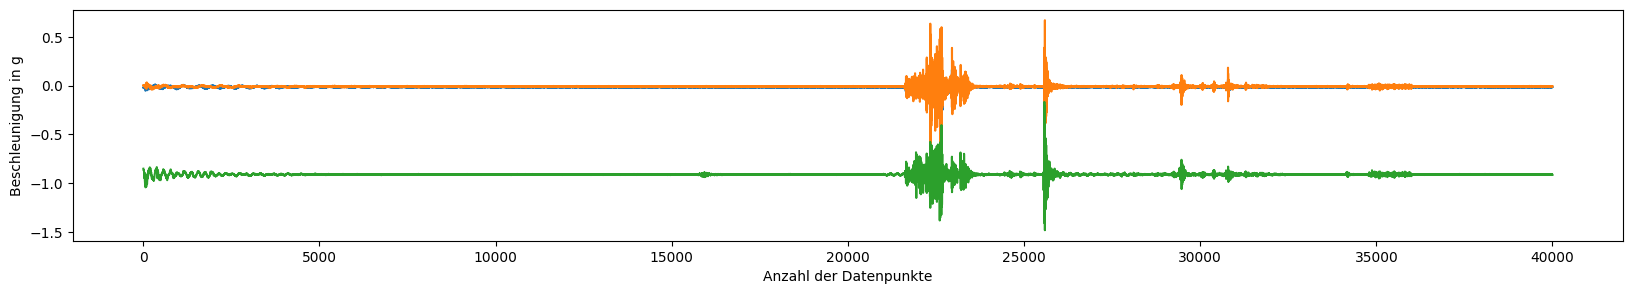

['largeloadcarriertrolley'] Anzahl Aufnahmen:  15


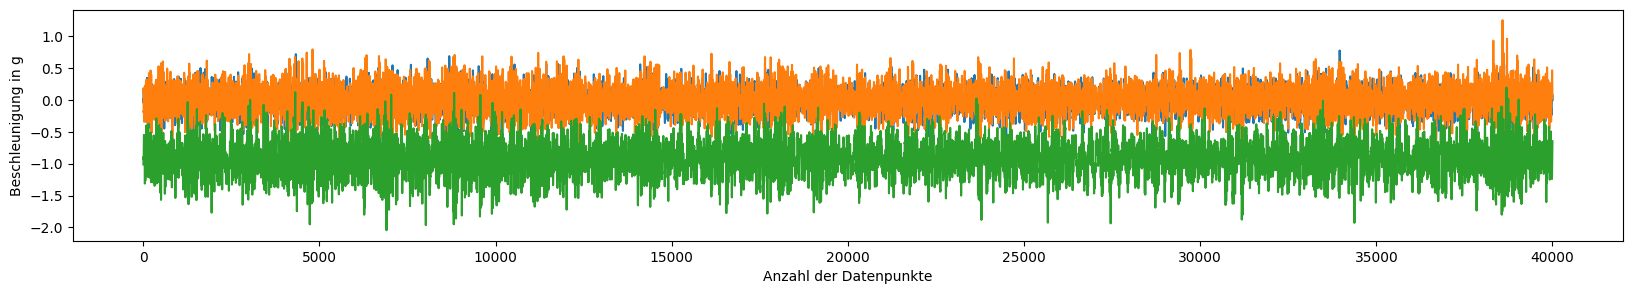

['liftingandlowering'] Anzahl Aufnahmen:  15


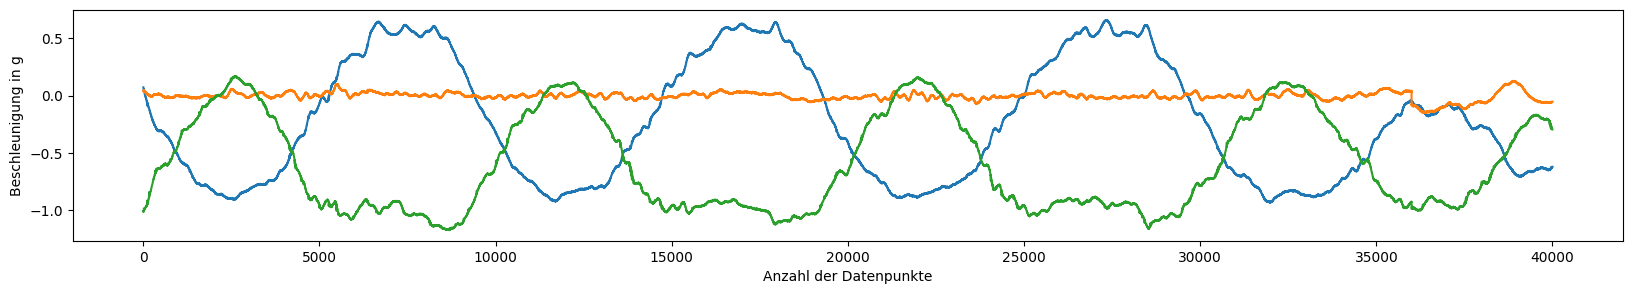

['movingtable'] Anzahl Aufnahmen:  15


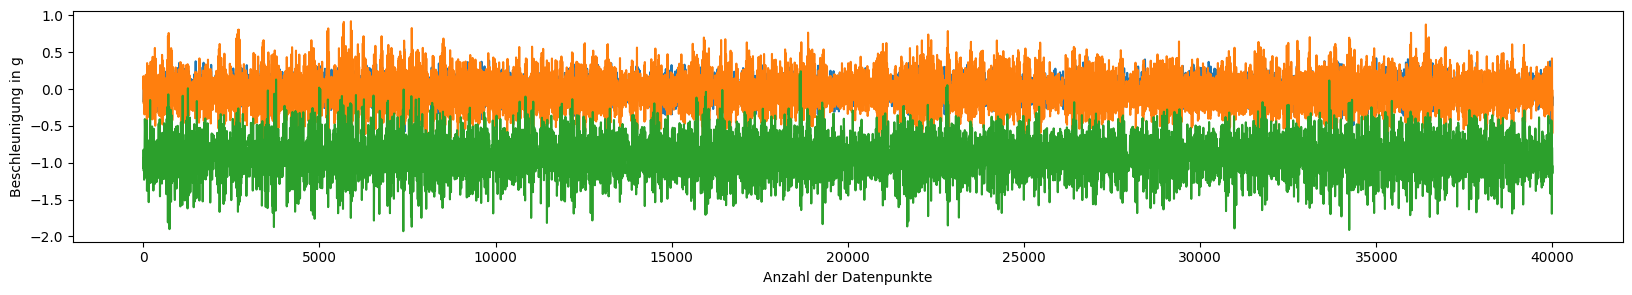

['palletjack'] Anzahl Aufnahmen:  15


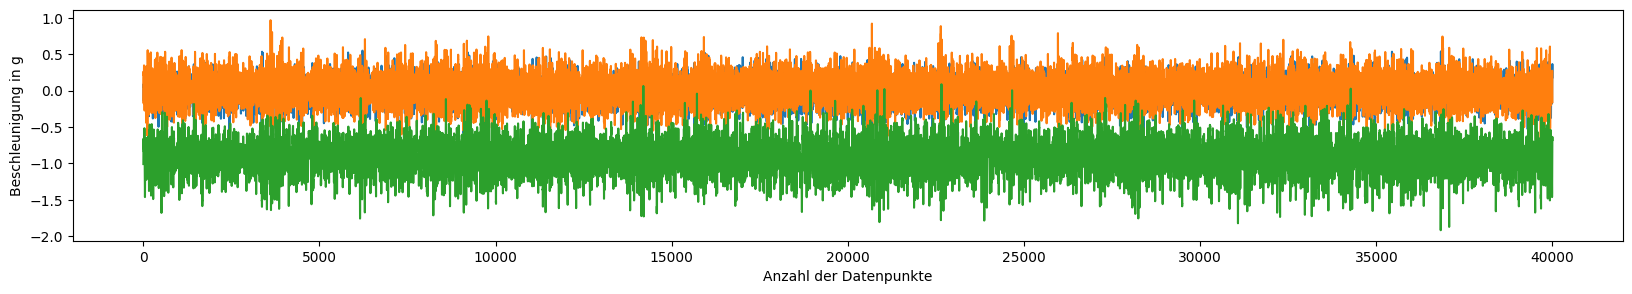

['rollerconveyor'] Anzahl Aufnahmen:  15


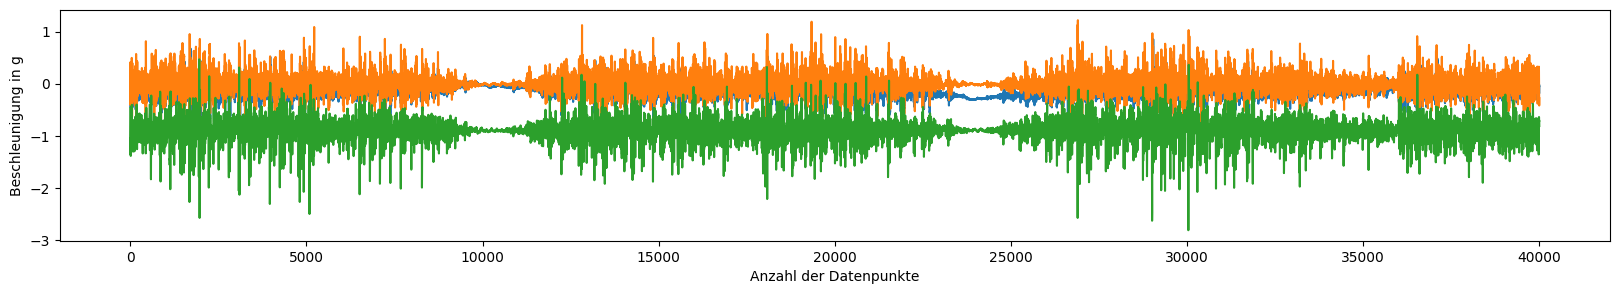

['rotatehorizontally'] Anzahl Aufnahmen:  15


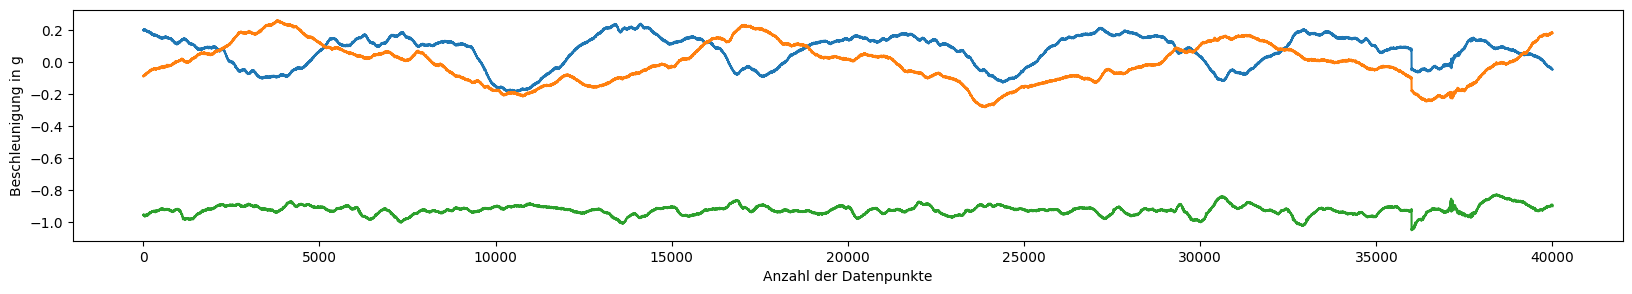

['sacktrolley'] Anzahl Aufnahmen:  15


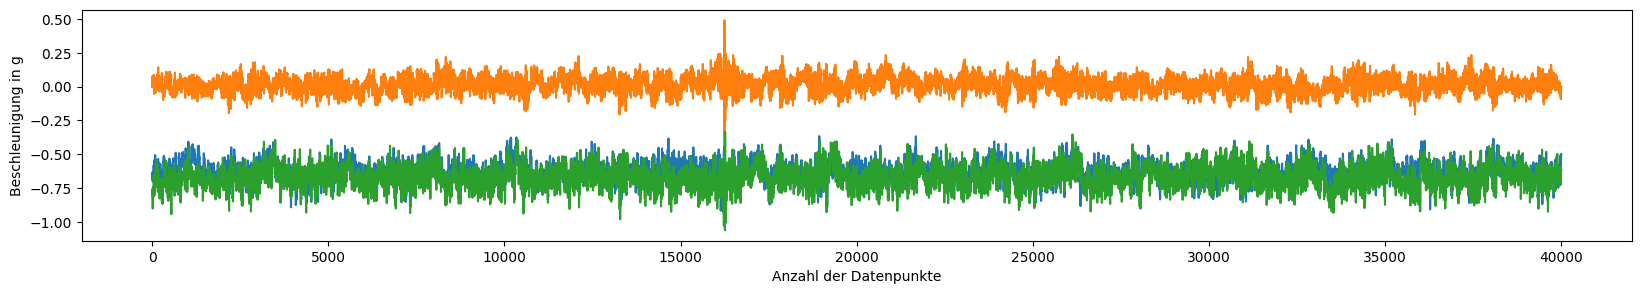

['walking'] Anzahl Aufnahmen:  15


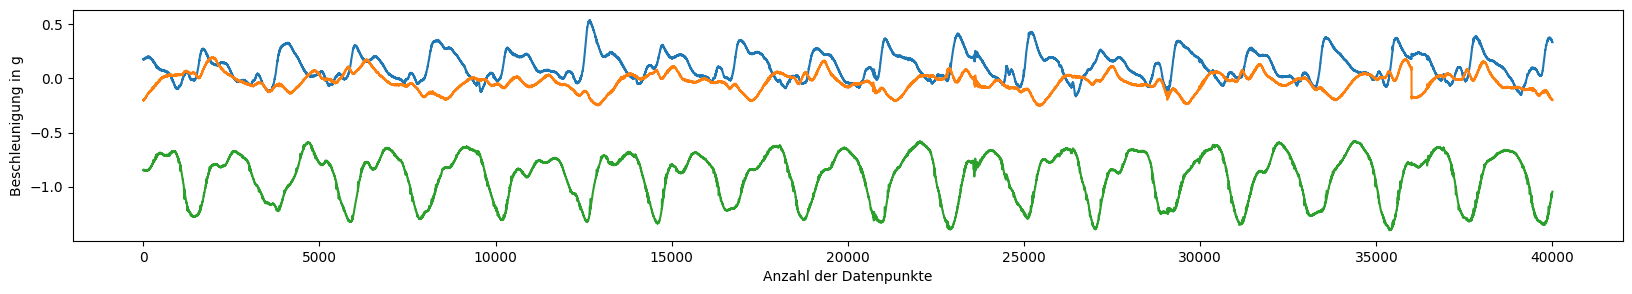

In [12]:
plotRandomDatapointsOfEachLabel(data, labels,type="line")

In [13]:
import numpy as np
from scipy.stats import skew, kurtosis

def extract_features(accel_data):
    # Initialize the result array with zeros
    num_recordings = accel_data.shape[0]
    num_axes = 3
    num_features = 20
    features = np.zeros((num_recordings, num_axes, num_features))

    # Calculate the features for each axis and recording separately
    for recording in range(num_recordings):
        recording_data = accel_data[recording]

        for axis in range(num_axes):
            axis_data = recording_data[:, axis]

            max_value = np.max(axis_data)
            min_value = np.min(axis_data)
            abs_max_value = np.max(np.abs(axis_data))
            abs_min_value = np.min(np.abs(axis_data))
            mean_value = np.mean(axis_data)
            abs_energy_value = np.sum(np.square(axis_data))
            mean_abs_change_value = np.mean(np.abs(np.diff(axis_data)))
            cid_ce_value = np.sum(np.abs(np.diff(axis_data))) / (np.sum(np.abs(axis_data)) + 1e-9)
            std_value = np.std(axis_data)
            var_value = np.var(axis_data)
            count_above_mean_value = np.sum(axis_data > mean_value)
            count_below_mean_value = np.sum(axis_data < mean_value)
            first_position_of_max_value = np.argmax(axis_data)
            first_position_of_min_value = np.argmin(axis_data)
            max_count_value = np.sum(axis_data == max_value)
            min_count_value = np.sum(axis_data == min_value)
            has_large_std_value = int(std_value > np.percentile(axis_data, 95))
            skew_value = skew(axis_data)
            kurtosis_value = kurtosis(axis_data)
            variation_coefficient_value = np.std(axis_data) / np.mean(axis_data)

            # Add the features to the result array
            features[recording, axis] = np.array([
                max_value, min_value, abs_max_value, abs_min_value, mean_value,
                abs_energy_value, mean_abs_change_value, cid_ce_value, std_value,
                var_value, count_above_mean_value, count_below_mean_value,
                first_position_of_max_value, first_position_of_min_value,
                max_count_value, min_count_value, has_large_std_value, skew_value,
                kurtosis_value, variation_coefficient_value
            ])

    # Combine the features for all three axes
    features = features.reshape(num_recordings, -1)

    # Return the features as a NumPy array
    return features

In [14]:
data = extract_features(data)

In [15]:
data.shape

(135, 60)

In [16]:
import pandas as pd
dataDF = pd.DataFrame(data)

In [17]:
dataDF

0         1         2             3         4             5   \
0    0.331989 -0.338011  0.338011  1.208037e-05 -0.034970    563.336471   
1    0.592768 -0.666317  0.666317  6.532090e-07 -0.014264   1025.189192   
2    0.448393 -0.498175  0.498175  7.511768e-06 -0.014726    650.145688   
3    0.617683 -0.886742  0.886742  6.608746e-06 -0.151333   1447.291987   
4    0.659111 -0.935465  0.935465  7.373644e-06 -0.226258  12781.052794   
..        ...       ...       ...           ...       ...           ...   
130 -0.304339 -0.999901  0.999901  3.043385e-01 -0.626871  15964.883559   
131  0.546844 -0.576276  0.576276  6.605356e-06  0.001322    610.168857   
132 -0.007171 -0.023602  0.023602  7.171044e-03 -0.015233      9.446770   
133  0.008113 -0.032783  0.032783  1.229424e-04 -0.015293      9.560951   
134  0.639307 -0.716423  0.716423  3.882228e-06 -0.011129   1273.674555   

           6         7         8         9   ...       50       51       52  \
0    0.001518  0.015123  0.113404  0.012861  ...  23076.0  16924.0   5349.0   
1    0.035918  0.280365  0.159456  0.025426  ...  20478.0  19522.0  21752.0   
2    0.029444  0.288524  0.126636  0.016037  ...  20189.0  19811.0   6968.0   
3    0.029657  0.183044  0.115242  0.013281  ...  20799.0  19201.0  26744.0   
4    0.001321  0.002625  0.518009  0.268334  ...  17196.0  22804.0   2588.0   
..        ...       ...       ...       ...  ...      ...      ...      ...   
130  0.011154  0.017792  0.078451  0.006155  ...  20288.0  19712.0   4411.0   
131  0.030132  0.303994  0.123501  0.015252  ...  20352.0  19648.0  18663.0   
132  0.001230  0.080761  0.002028  0.000004  ...  19888.0  20112.0  12031.0   
133  0.001230  0.080399  0.002270  0.000005  ...  20132.0  19868.0   8893.0   
134  0.032188  0.225079  0.178096  0.031718  ...  20249.0  19751.0  34323.0   

          53   54   55   56        57        58        59  
0    10469.0  1.0  1.0  1.0 -0.484499 -0.936118 -0.243138  
1    21740.0  1.0  1.0  1.0 -0.161766  0.355094 -0.255247  
2    18604.0  1.0  1.0  1.0 -0.086867  0.357432 -0.218339  
3    13031.0  1.0  1.0  1.0 -0.529102  4.119772 -0.212577  
4     8680.0  1.0  1.0  1.0  0.468533 -1.285792 -0.675910  
..       ...  ...  ...  ...       ...       ...       ...  
130   4435.0  1.0  1.0  1.0 -0.107973  0.395179 -0.120124  
131   7379.0  1.0  1.0  1.0 -0.105415  0.226013 -0.281865  
132  27736.0  1.0  1.0  1.0  0.031725  0.025446 -0.001913  
133   8879.0  1.0  1.0  1.0  0.026005  2.563113 -0.002140  
134  37128.0  1.0  1.0  1.0 -0.097459  0.074976 -0.267159  

[135 rows x 60 columns]

In [18]:
ypred = loaded_model.predict(dataDF)

In [19]:
ypred = np.array([str(item) for item in ypred])  # Convert elements to strings
ypred = np.char.lower(np.char.replace(ypred, ' ', ''))

In [20]:
ypred.shape

(135,)

In [21]:
np.unique(ypred)

array(['idle', 'liftingandlowering', 'movingtable', 'palletjack',
       'rollerconveyor', 'rotatehorizontally', 'sacktrolley', 'walking'],
      dtype='<U18')

In [22]:
labels.shape

(135, 1)

In [23]:
labels = labels.reshape(135)

In [24]:

# Assuming you have the NumPy arrays ypred and labels with shape (135,)
input = {'predicted': ypred, 'actual': labels}
df = pd.DataFrame(input)

# Printing the DataFrame
print(df)


              predicted                   actual
0               walking                  walking
1            palletjack               palletjack
2           movingtable               palletjack
3        rollerconveyor           rollerconveyor
4    liftingandlowering       liftingandlowering
..                  ...                      ...
130         sacktrolley              sacktrolley
131      rollerconveyor              movingtable
132                idle                     idle
133                idle                     idle
134          palletjack  largeloadcarriertrolley

[135 rows x 2 columns]


In [25]:
df["error"] = df.apply(lambda row: 1 if row["predicted"] != row["actual"] else 0, axis=1)

In [26]:
df["error"].values.shape

(135,)

In [27]:
indicesOfErrors = []
for idx,error in enumerate(df["error"].values):
    if error:
        indicesOfErrors.append(idx)
print(indicesOfErrors)

[2, 15, 16, 17, 22, 23, 26, 34, 42, 43, 48, 66, 67, 69, 70, 72, 75, 76, 77, 84, 85, 89, 93, 94, 95, 101, 104, 106, 107, 115, 120, 122, 124, 128, 131, 134]


index:  2 label:  palletjack


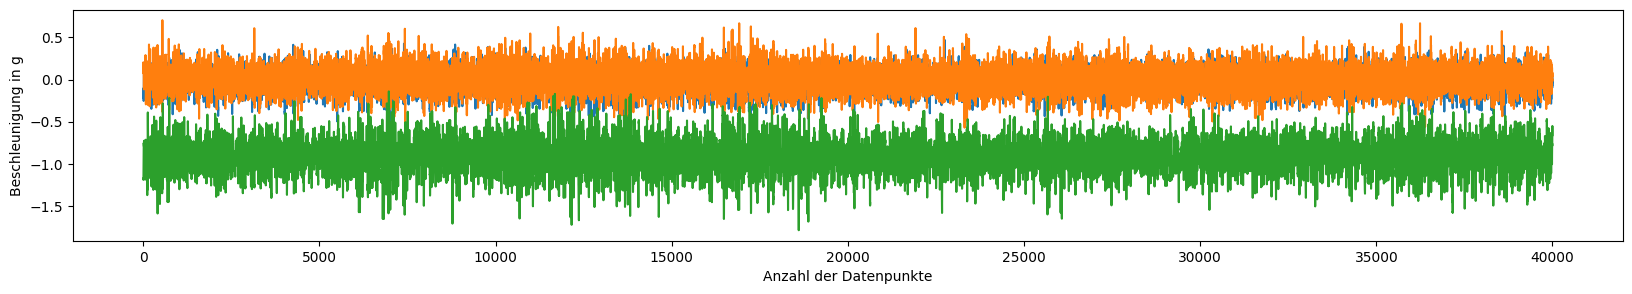

index:  15 label:  rotatehorizontally


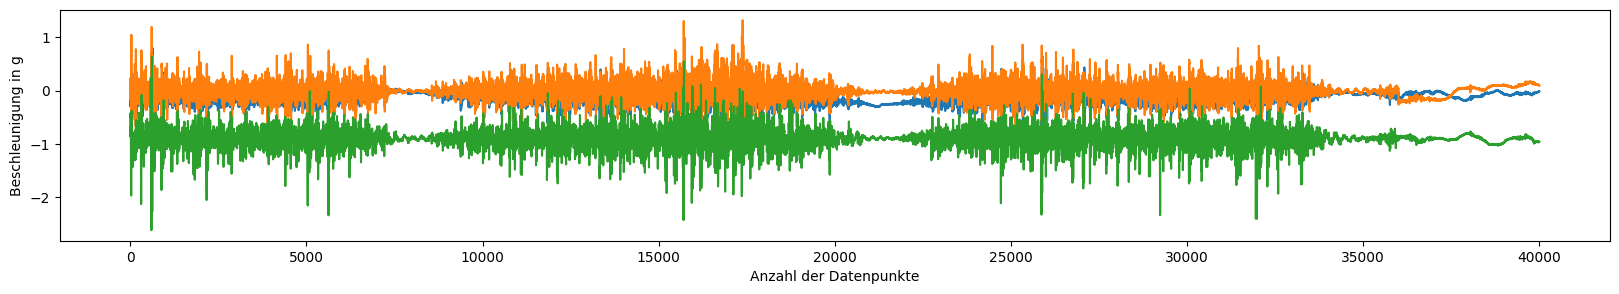

index:  16 label:  movingtable


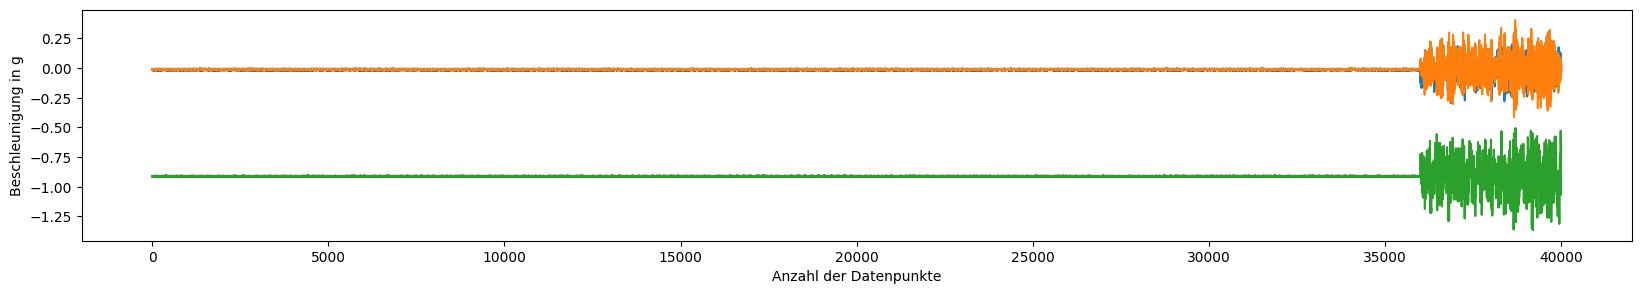

index:  17 label:  largeloadcarriertrolley


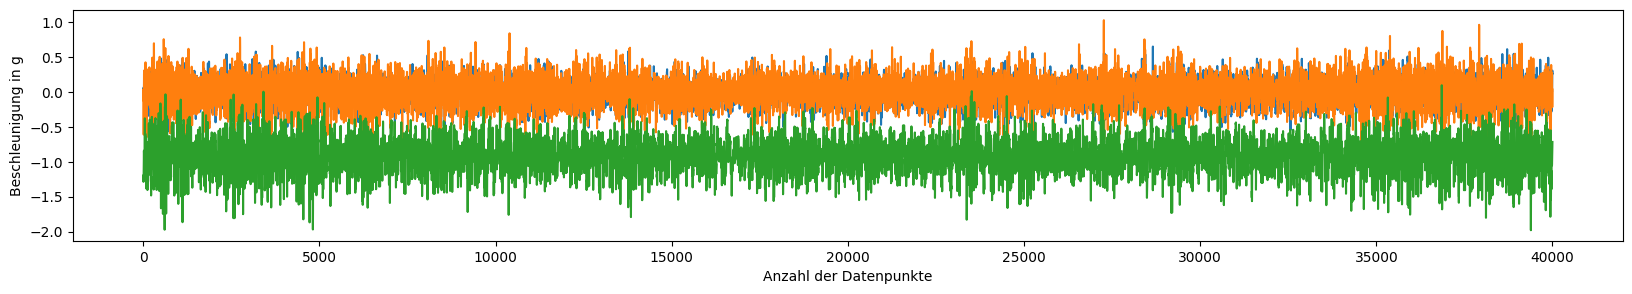

index:  22 label:  movingtable


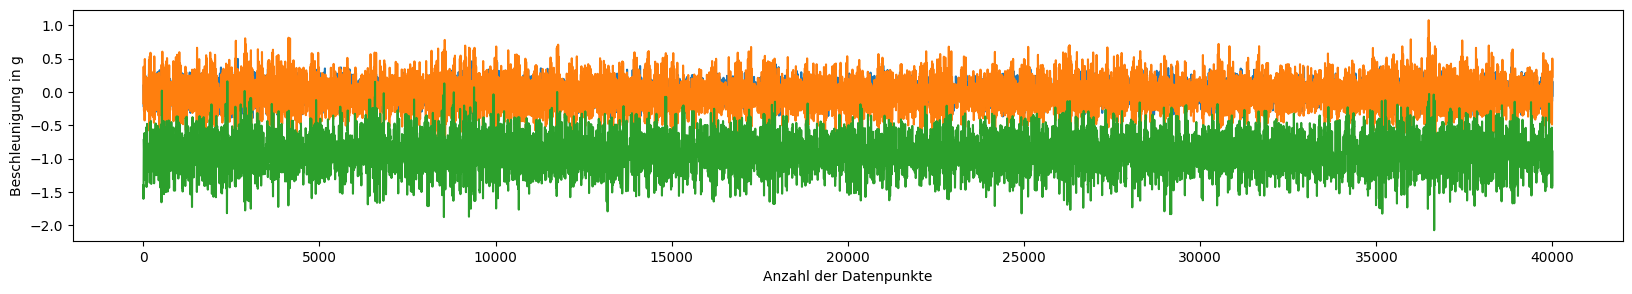

index:  23 label:  movingtable


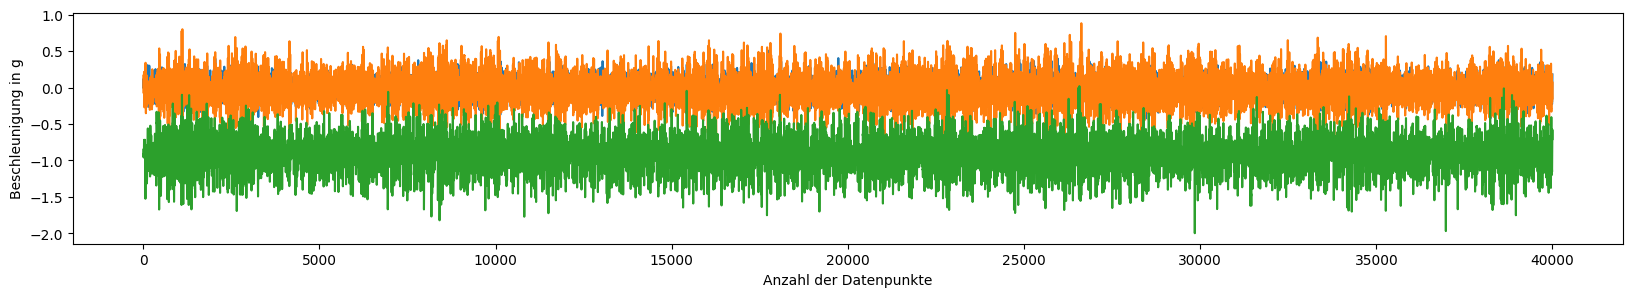

index:  26 label:  largeloadcarriertrolley


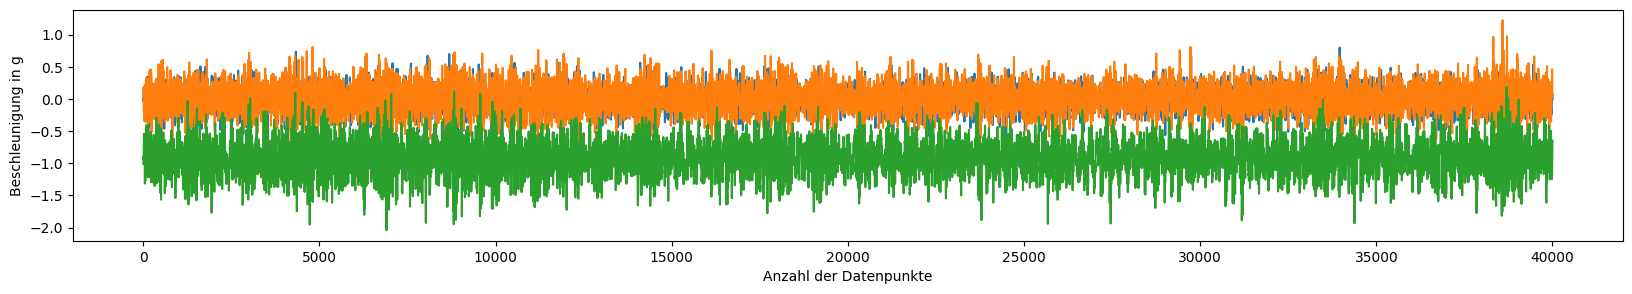

index:  34 label:  largeloadcarriertrolley


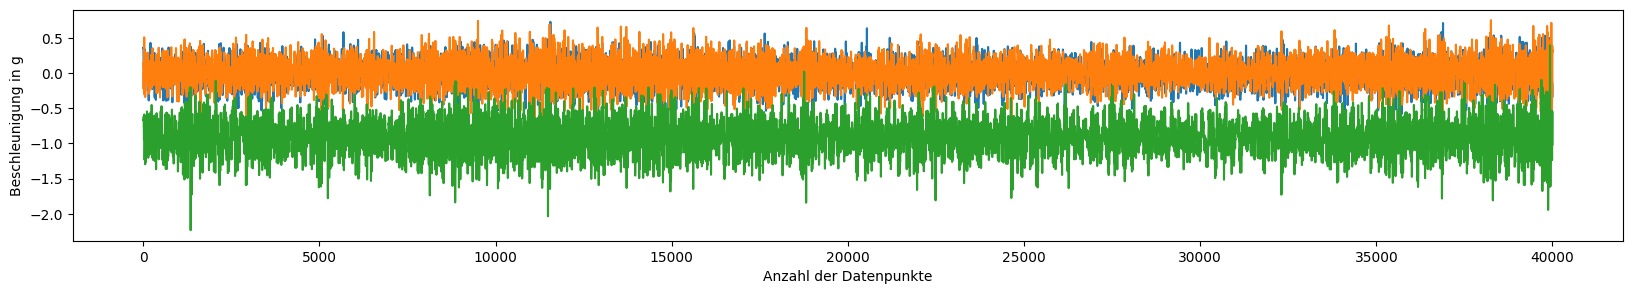

index:  42 label:  idle


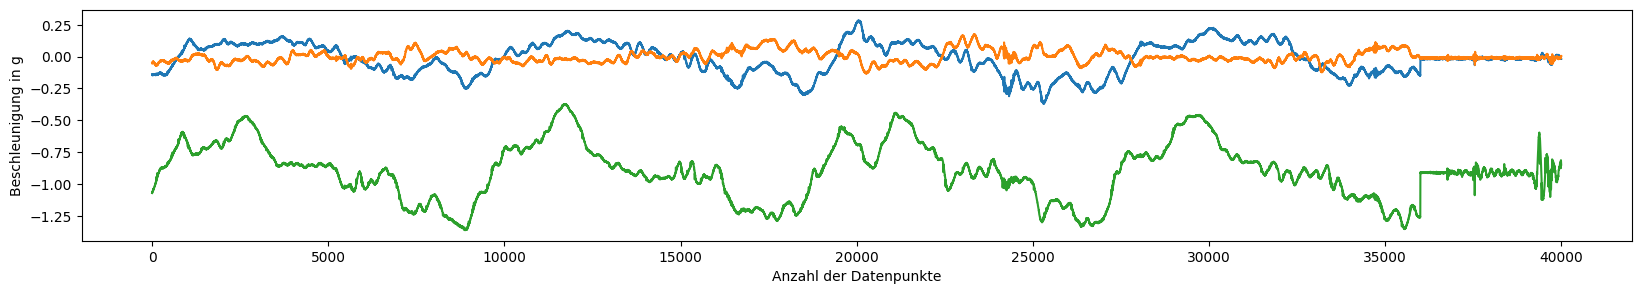

index:  43 label:  largeloadcarriertrolley


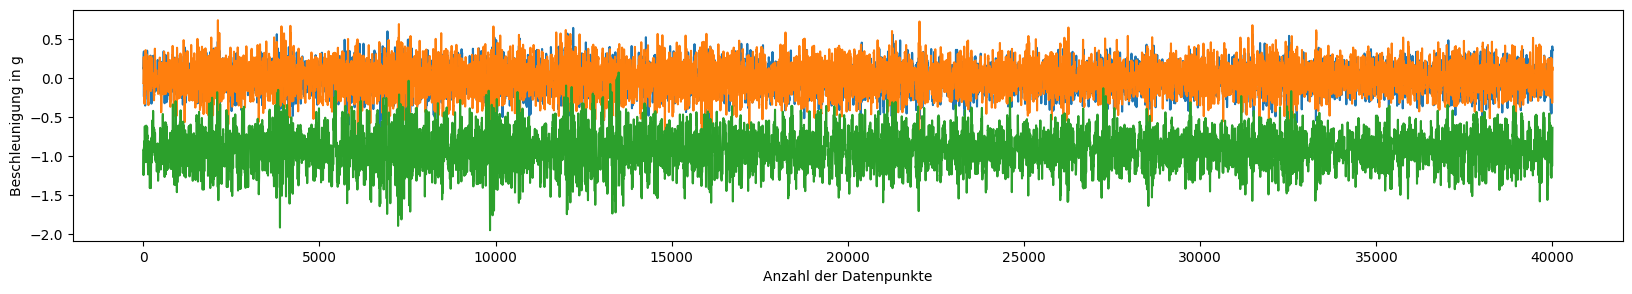

index:  48 label:  movingtable


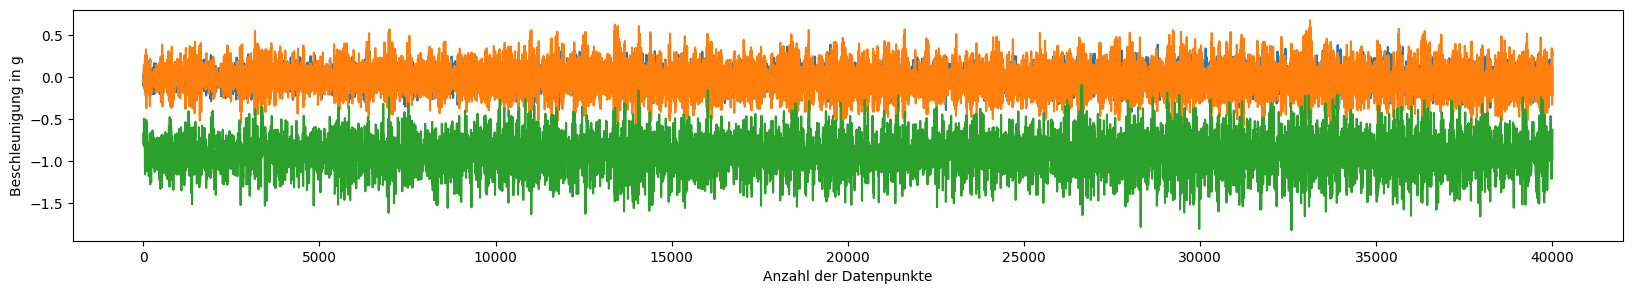

index:  66 label:  movingtable


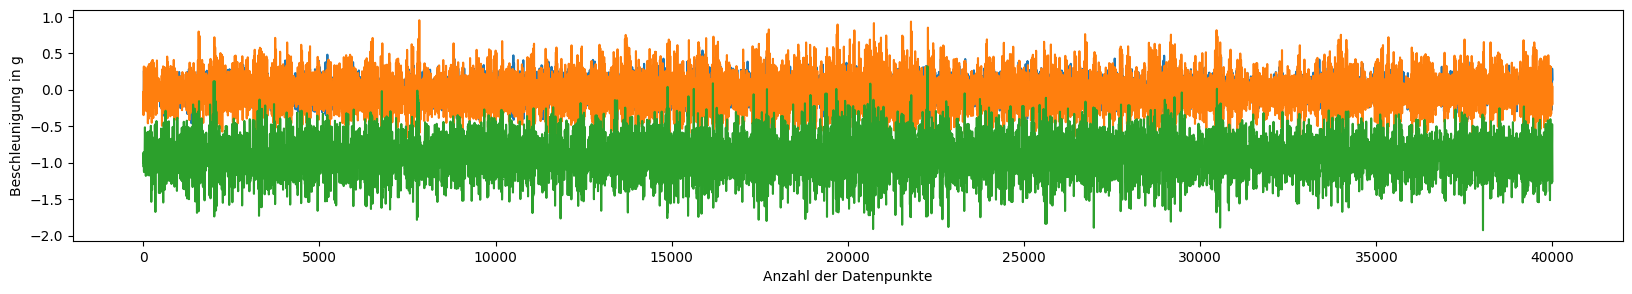

index:  67 label:  movingtable


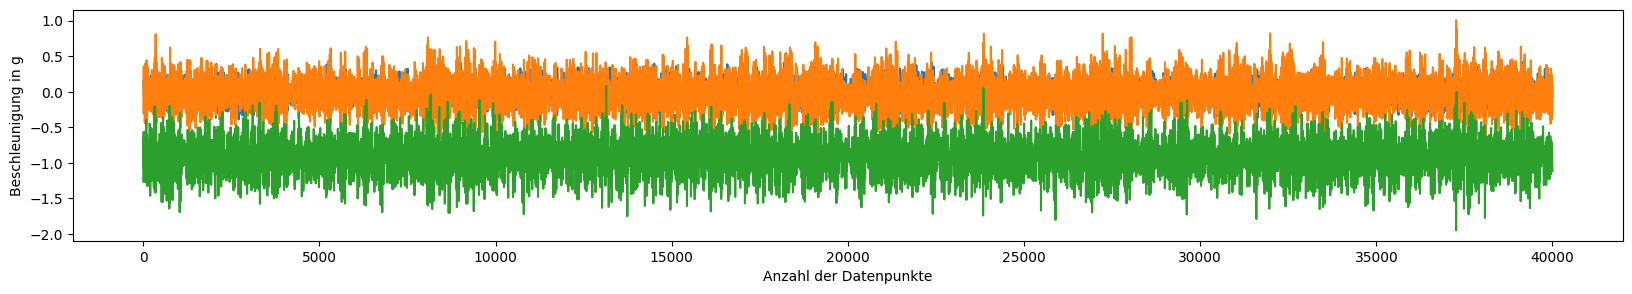

index:  69 label:  sacktrolley


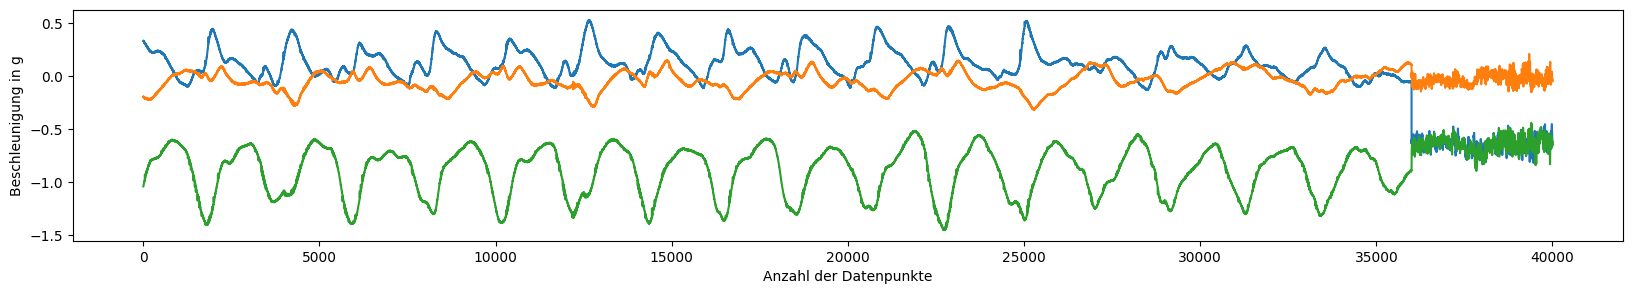

index:  70 label:  movingtable


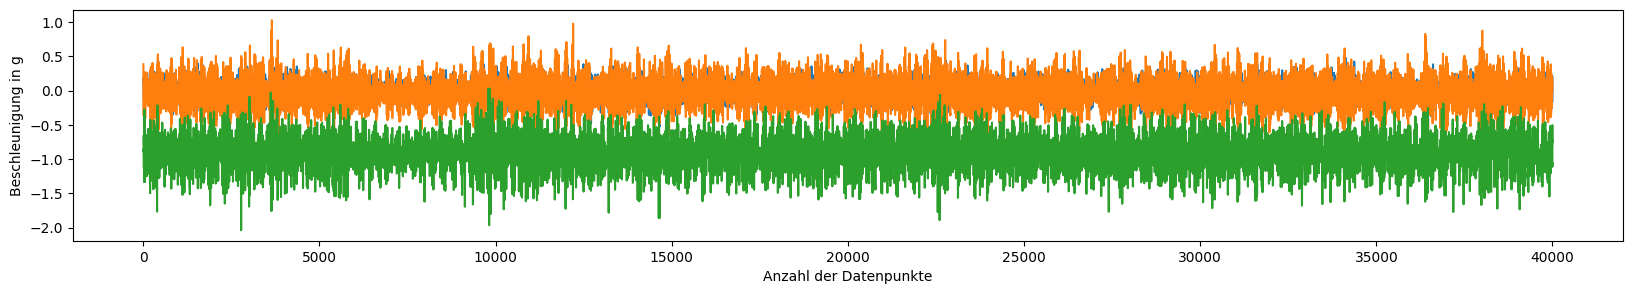

index:  72 label:  movingtable


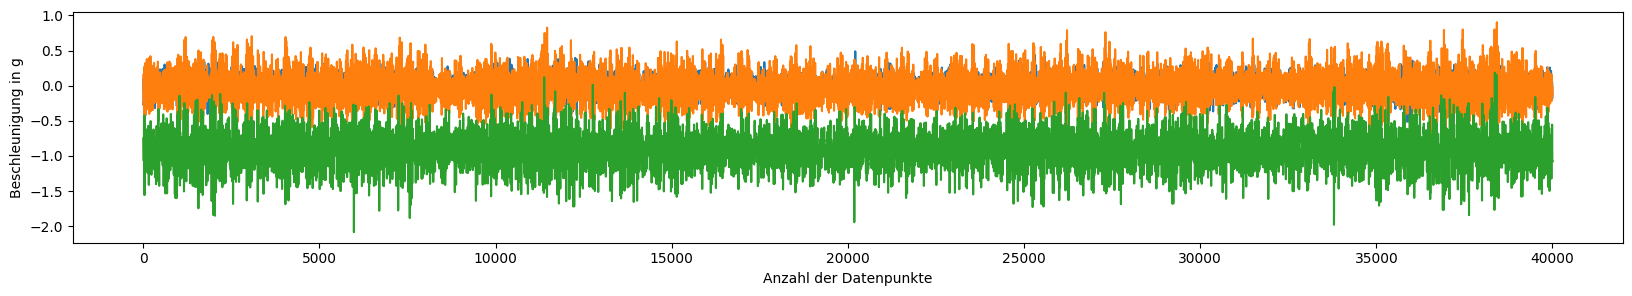

index:  75 label:  movingtable


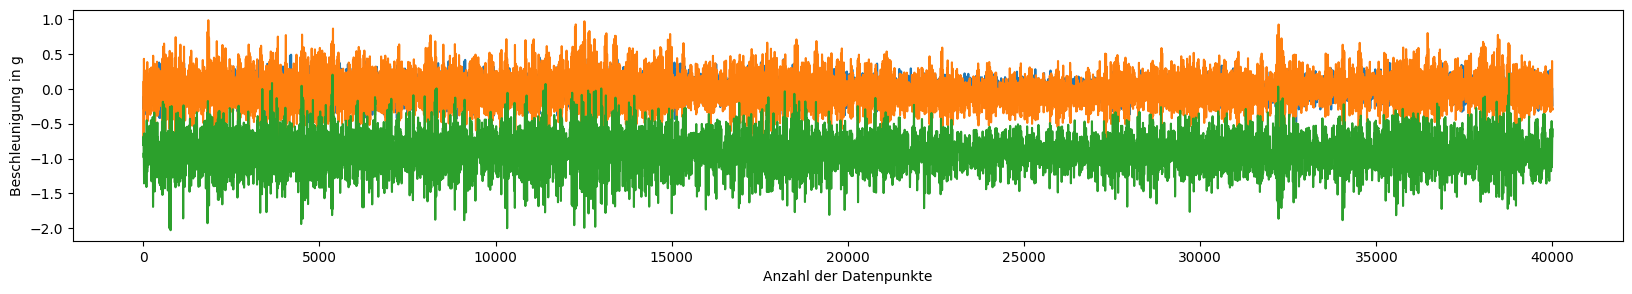

index:  76 label:  largeloadcarriertrolley


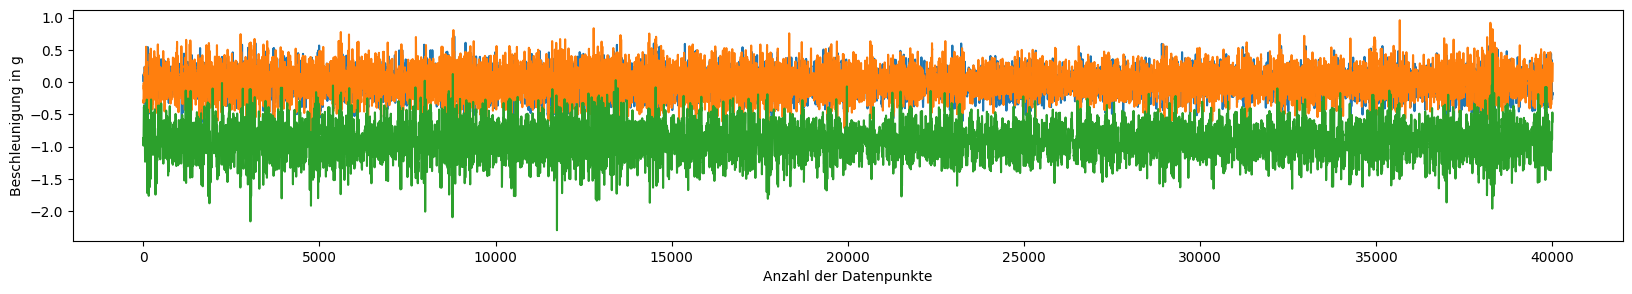

index:  77 label:  largeloadcarriertrolley


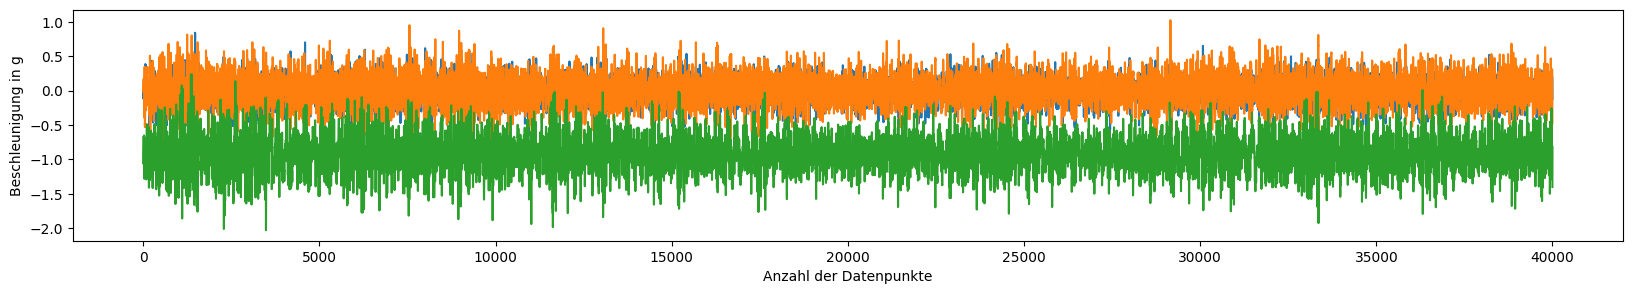

index:  84 label:  palletjack


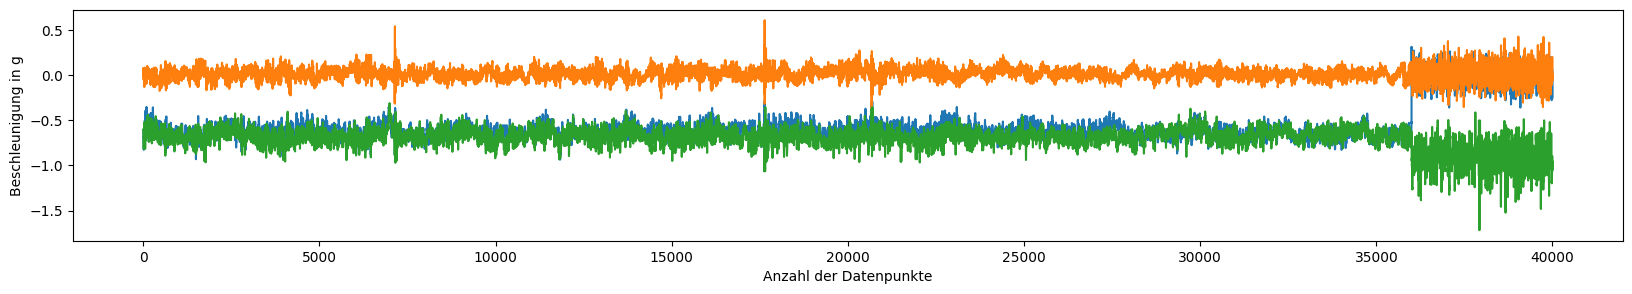

index:  85 label:  largeloadcarriertrolley


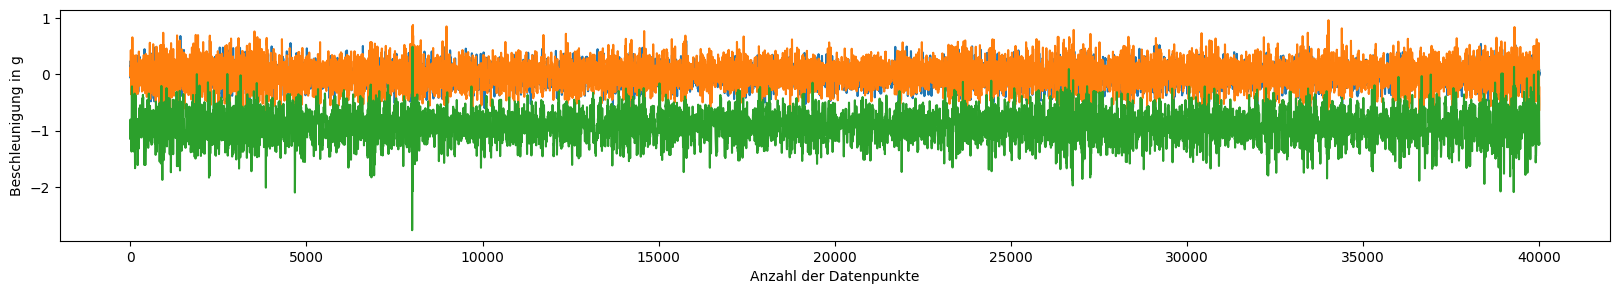

index:  89 label:  walking


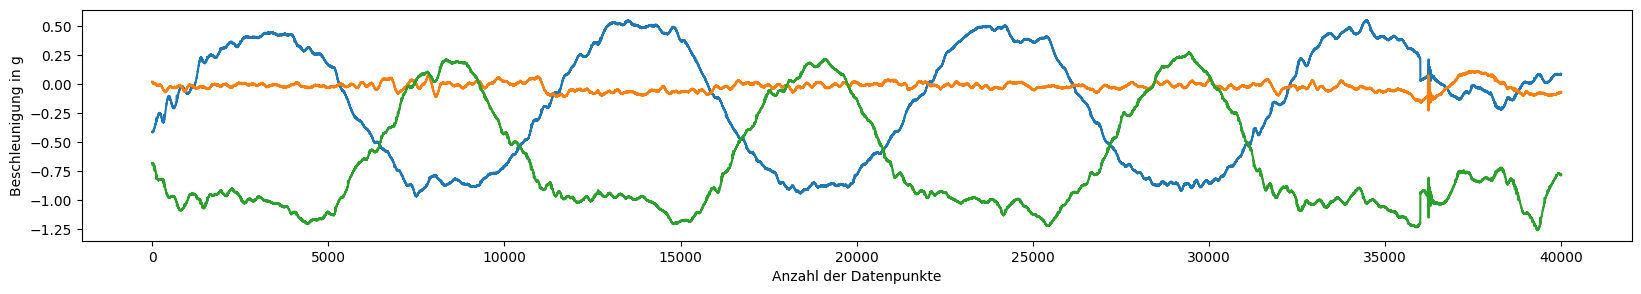

index:  93 label:  largeloadcarriertrolley


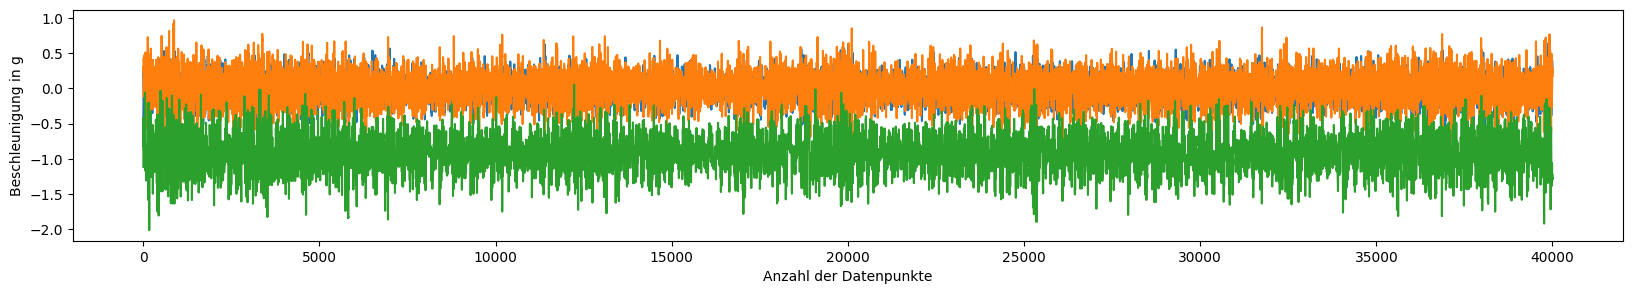

index:  94 label:  movingtable


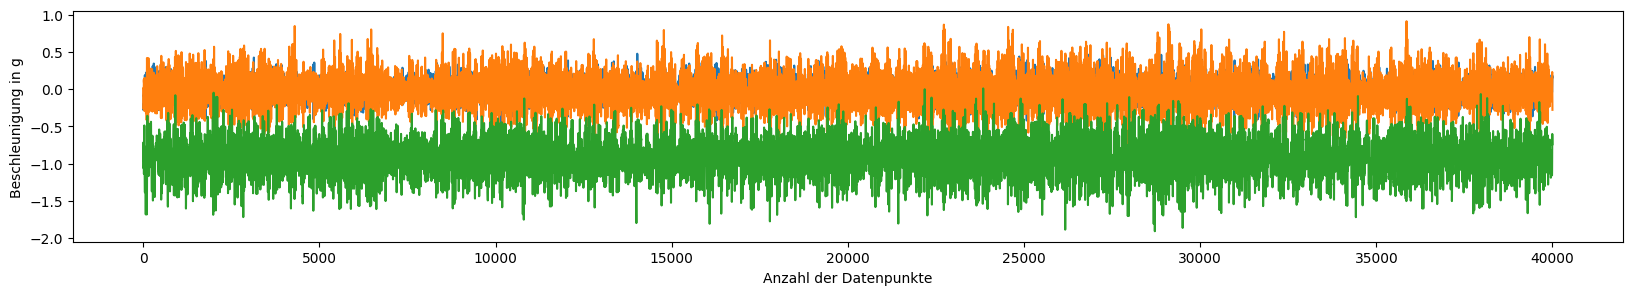

index:  95 label:  movingtable


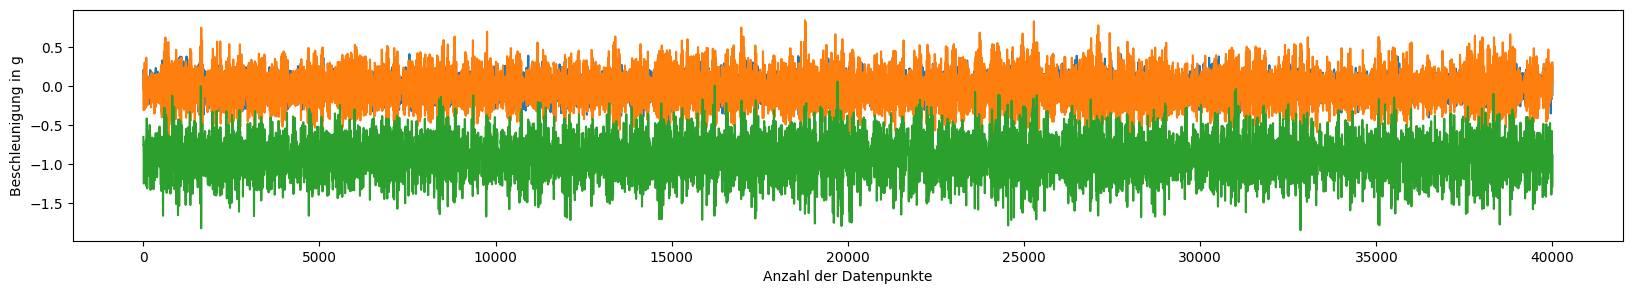

index:  101 label:  largeloadcarriertrolley


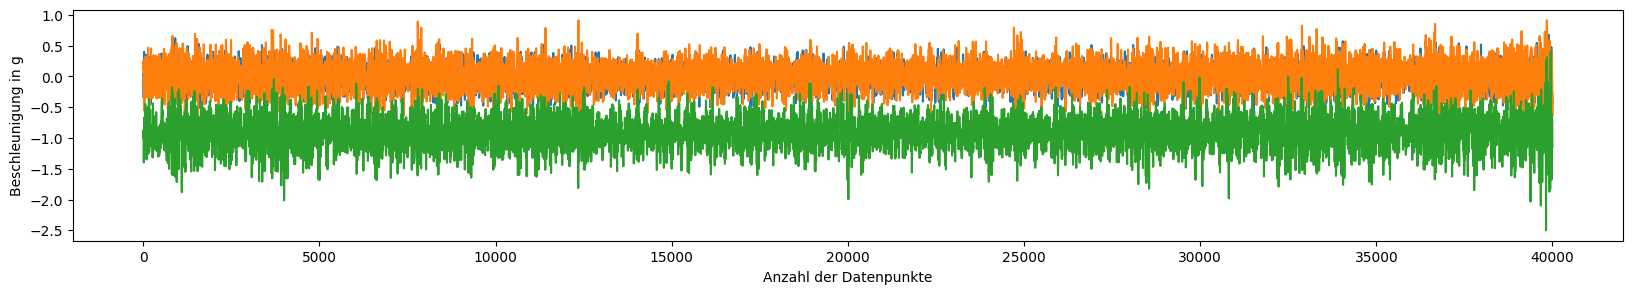

index:  104 label:  largeloadcarriertrolley


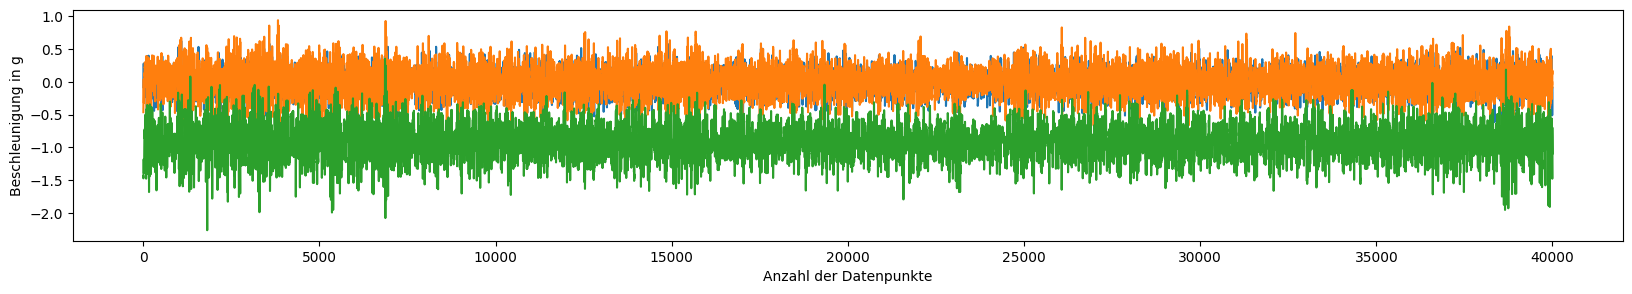

index:  106 label:  largeloadcarriertrolley


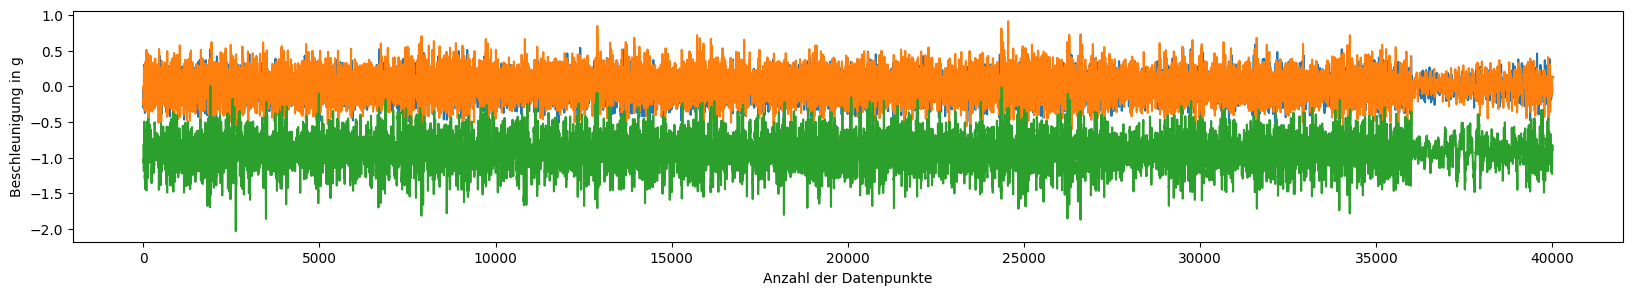

index:  107 label:  largeloadcarriertrolley


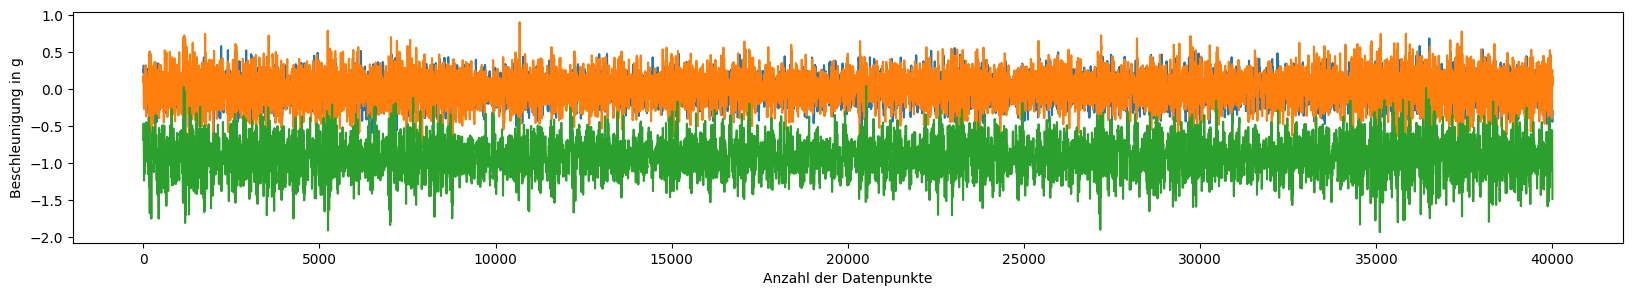

index:  115 label:  palletjack


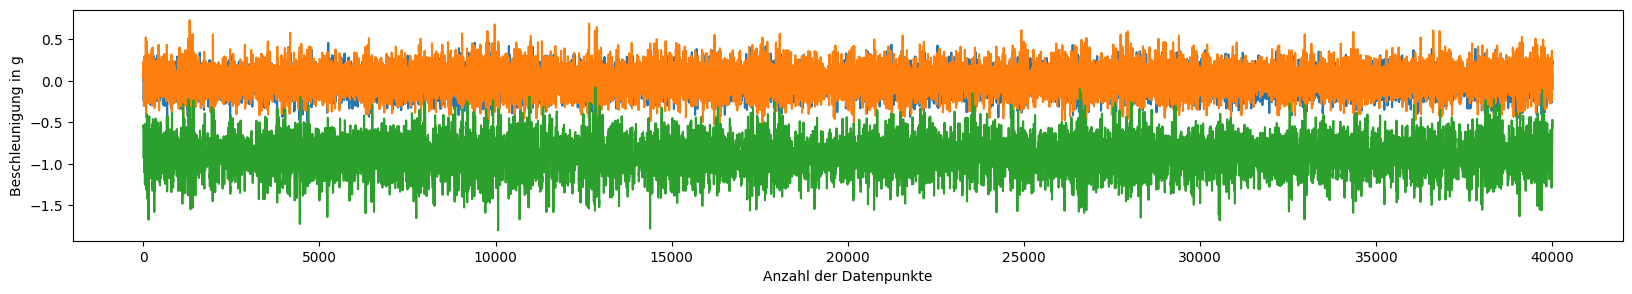

index:  120 label:  largeloadcarriertrolley


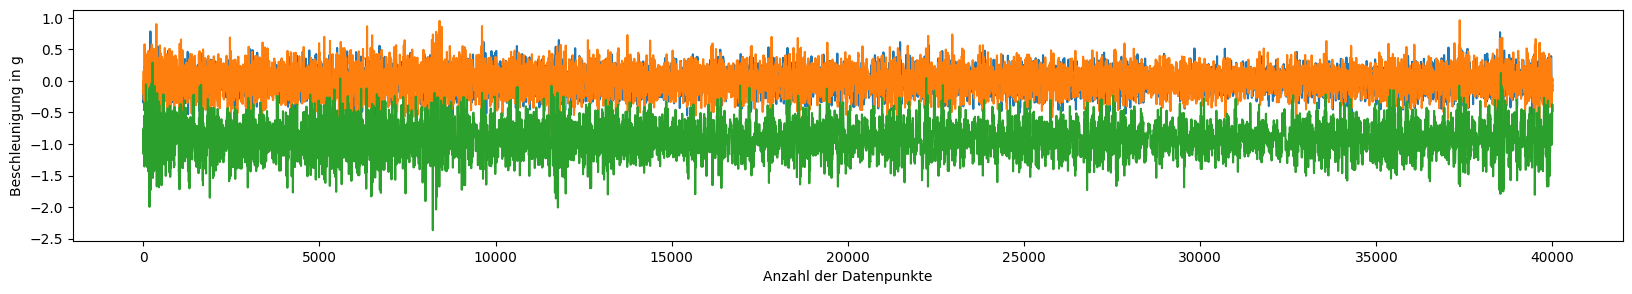

index:  122 label:  movingtable


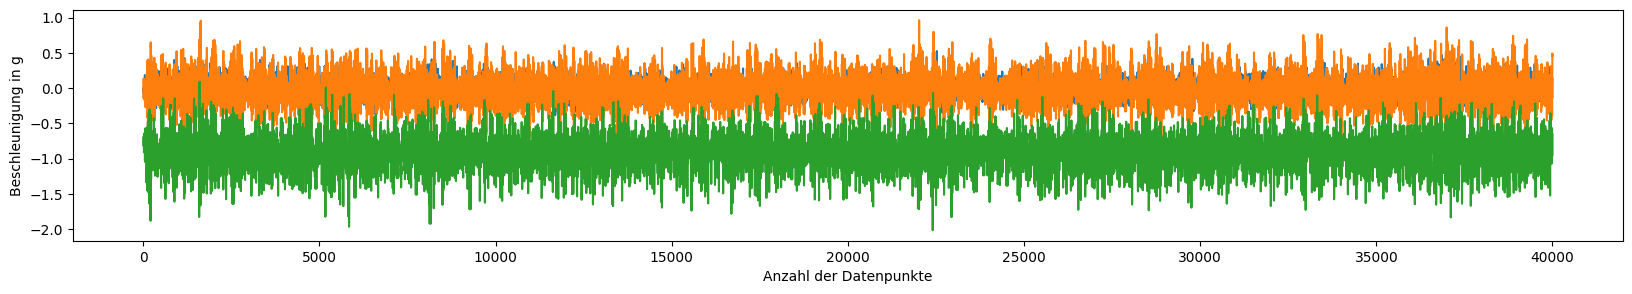

index:  124 label:  largeloadcarriertrolley


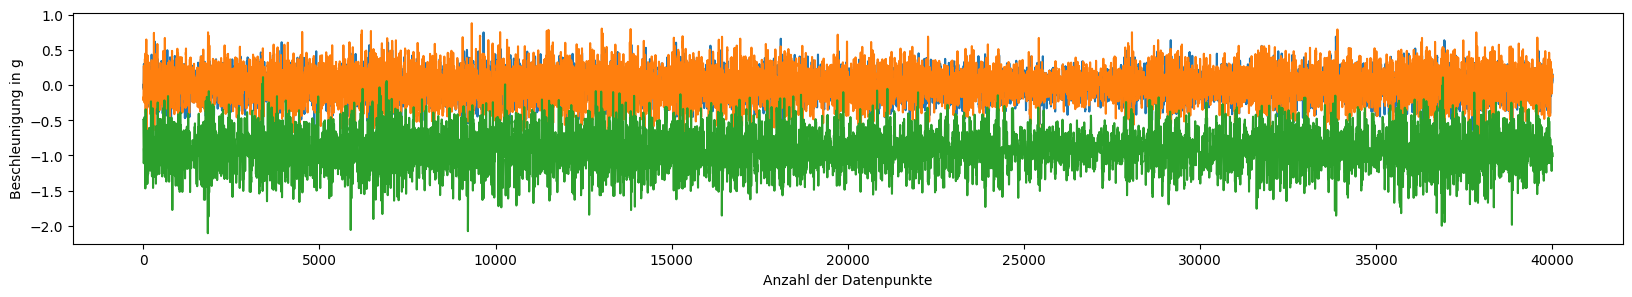

index:  128 label:  rollerconveyor


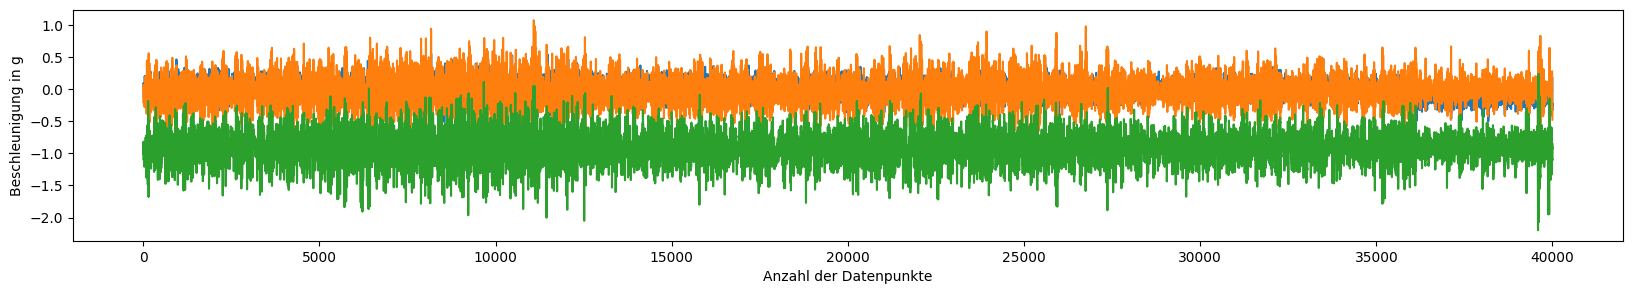

index:  131 label:  movingtable


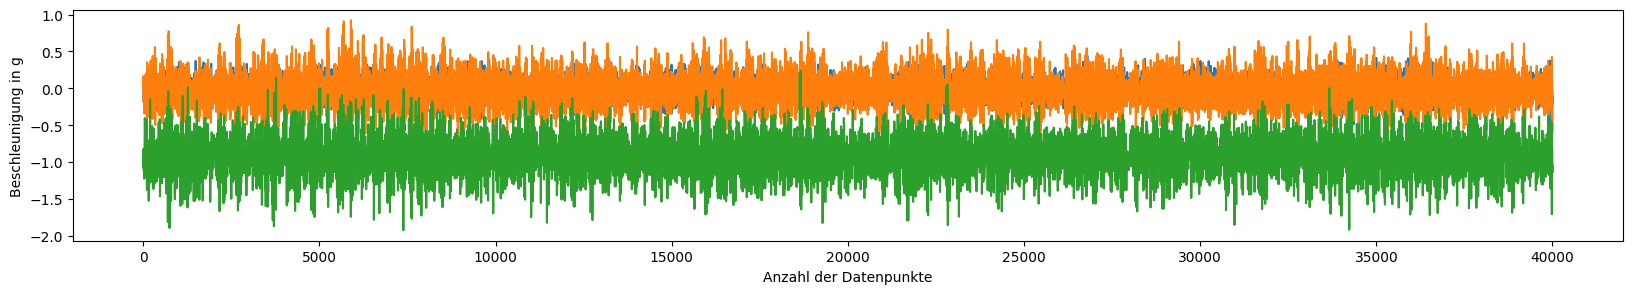

index:  134 label:  largeloadcarriertrolley


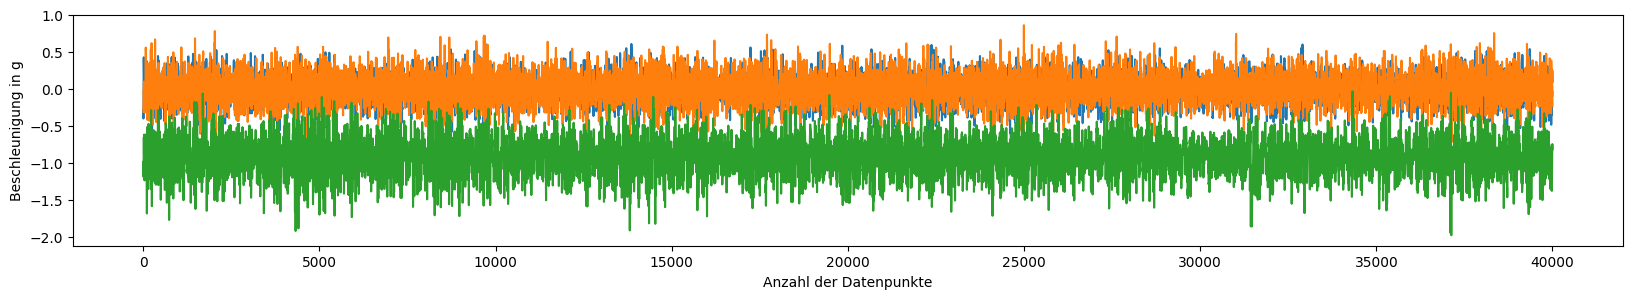

In [28]:
plotDatapointsViaIndicesOfLabel(acceleration_array, labels, indicesOfErrors)

In [29]:
# Assuming you have the DataFrame named 'df' with columns 'predicted' and 'actual'

# Create a crosstab of 'predicted' and 'actual' columns
confusion_matrix = pd.crosstab(df['predicted'], df['actual'])

# Printing the confusion matrix
print(confusion_matrix)

actual              idle  largeloadcarriertrolley  liftingandlowering  \
predicted                                                               
idle                  14                        0                   0   
liftingandlowering     1                        0                  15   
movingtable            0                        0                   0   
palletjack             0                       14                   0   
rollerconveyor         0                        1                   0   
rotatehorizontally     0                        0                   0   
sacktrolley            0                        0                   0   
walking                0                        0                   0   

actual              movingtable  palletjack  rollerconveyor  \
predicted                                                     
idle                          0           0               0   
liftingandlowering            1           0               0   
movingtable      

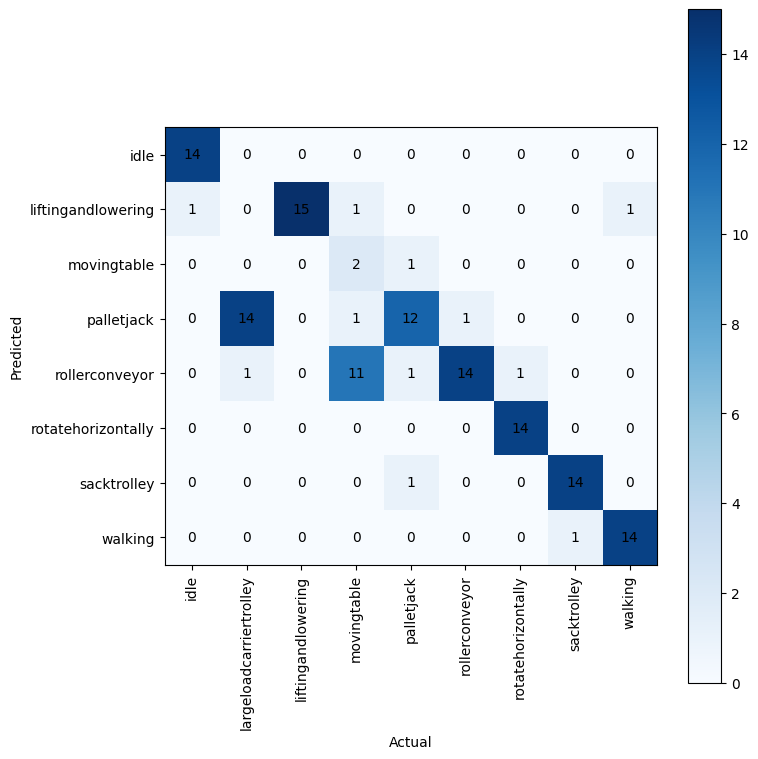

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have the confusion matrix stored in the variable 'confusion_matrix'

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the confusion matrix
im = ax.imshow(confusion_matrix, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(confusion_matrix.shape[1]))
ax.set_yticks(np.arange(confusion_matrix.shape[0]))
ax.set_xticklabels(confusion_matrix.columns, rotation=90)
ax.set_yticklabels(confusion_matrix.index)

# Add values to the plot
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        text = ax.text(j, i, confusion_matrix.iloc[i, j],
                       ha='center', va='center', color='black')

# Set axis titles
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

# Set colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Show plot
plt.tight_layout()
plt.show()


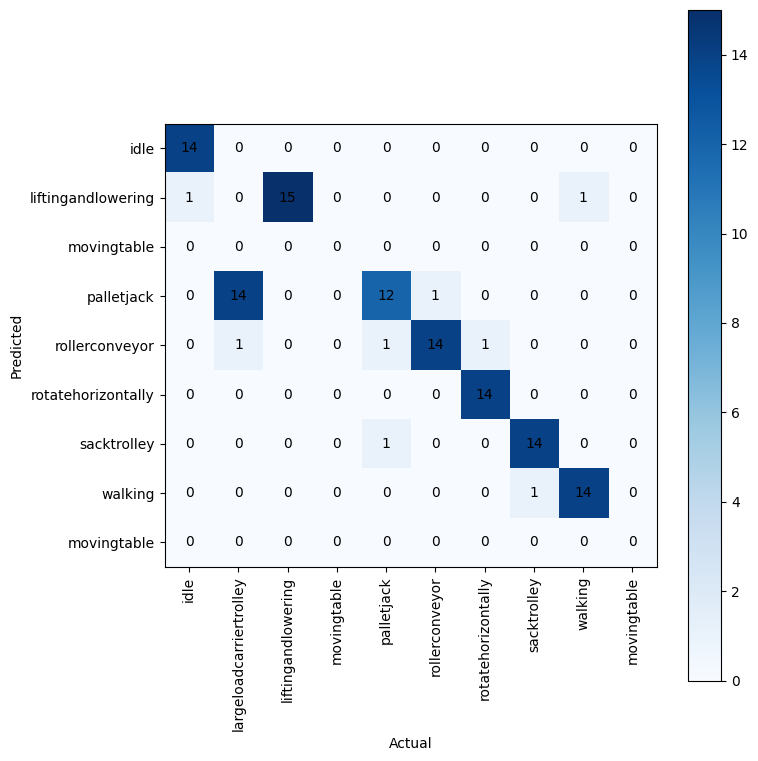

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming you have the confusion matrix stored in the variable 'confusion_matrix'

# Add an additional row and column for the "movingtable" label
confusion_matrix = confusion_matrix.reindex(index=confusion_matrix.index.append(pd.Index(["movingtable"])),
                                             columns=confusion_matrix.columns.append(pd.Index(["movingtable"])))
confusion_matrix.loc["movingtable", :] = 0
confusion_matrix.loc[:, "movingtable"] = 0

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the confusion matrix
im = ax.imshow(confusion_matrix, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(confusion_matrix.shape[1]))
ax.set_yticks(np.arange(confusion_matrix.shape[0]))
ax.set_xticklabels(confusion_matrix.columns, rotation=90)
ax.set_yticklabels(confusion_matrix.index)

# Add values to the plot
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        text = ax.text(j, i, confusion_matrix.iloc[i, j],
                       ha='center', va='center', color='black')

# Set axis titles
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

# Set colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Show plot
plt.tight_layout()
plt.show()


In [32]:
from sklearn.metrics import confusion_matrix

# Assuming you have the NumPy arrays 'ypred' and 'labels'

# Create the confusion matrix
cm = confusion_matrix(labels, ypred)

# Printing the confusion matrix
print(cm)


[[14  0  1  0  0  0  0  0  0]
 [ 0  0  0  0 14  1  0  0  0]
 [ 0  0 15  0  0  0  0  0  0]
 [ 0  0  1  2  1 11  0  0  0]
 [ 0  0  0  1 12  1  0  1  0]
 [ 0  0  0  0  1 14  0  0  0]
 [ 0  0  0  0  0  1 14  0  0]
 [ 0  0  0  0  0  0  0 14  1]
 [ 0  0  1  0  0  0  0  0 14]]


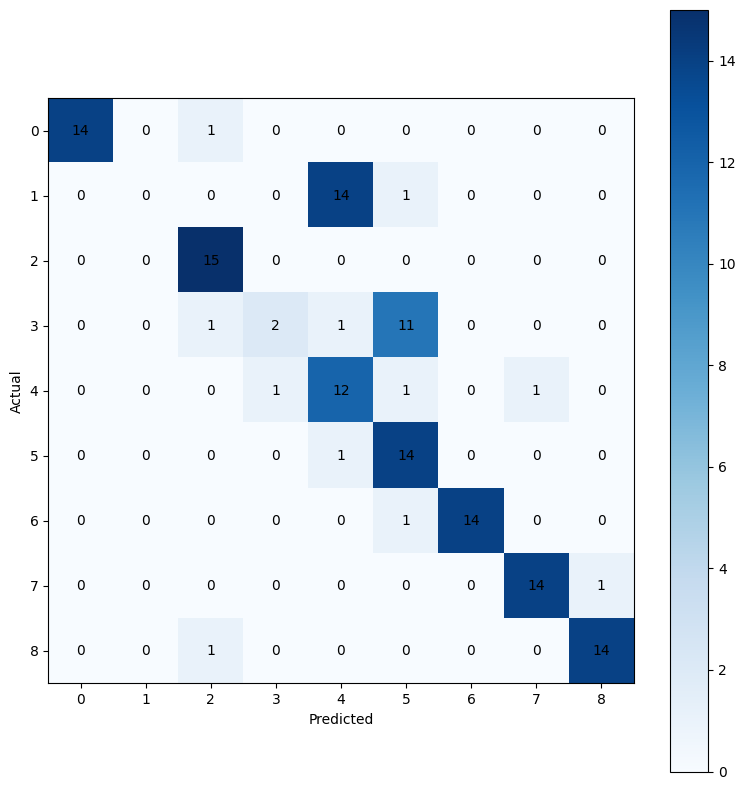

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming you have the confusion matrix stored in the variable 'cm'

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the confusion matrix
im = ax.imshow(cm, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(cm.shape[1]))
ax.set_yticks(np.arange(cm.shape[0]))

# Add values to the plot
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j, i, cm[i, j],
                       ha='center', va='center', color='black')

# Set axis titles
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

# Set colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Show plot
plt.tight_layout()
plt.show()


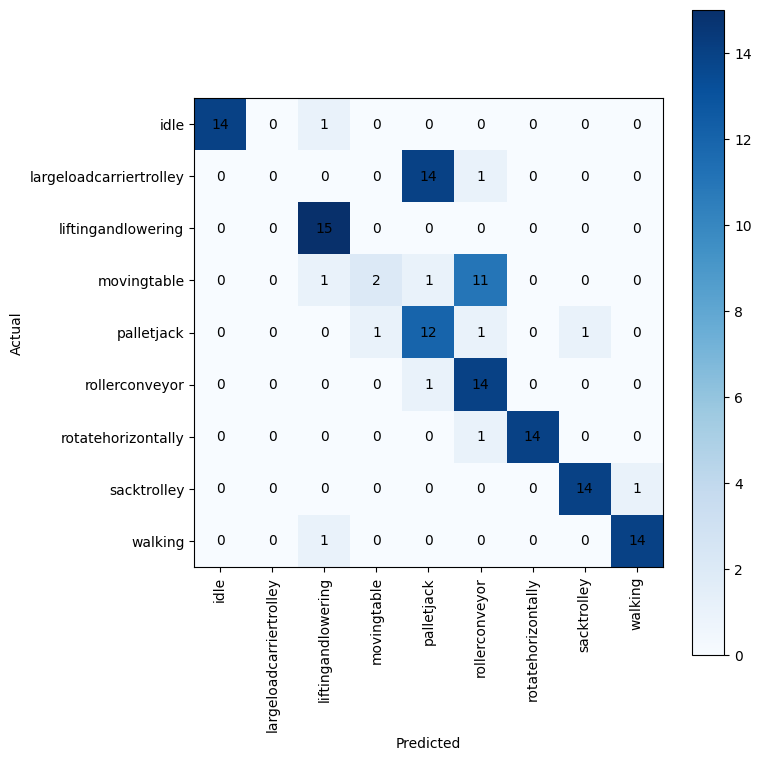

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming you have the confusion matrix stored in the variable 'cm'
# Assuming you have the 'labels' array with unique class labels

# Get the unique class labels from the confusion matrix
unique_labels = np.unique(labels)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the confusion matrix
im = ax.imshow(cm, cmap='Blues')

# Set axis labels
ax.set_xticks(np.arange(len(unique_labels)))
ax.set_yticks(np.arange(len(unique_labels)))
ax.set_xticklabels(unique_labels, rotation=90)
ax.set_yticklabels(unique_labels)

# Add values to the plot
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j, i, cm[i, j],
                       ha='center', va='center', color='black')

# Set axis titles
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

# Set colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Show plot
plt.tight_layout()
plt.show()


In [35]:
from sklearn.metrics import f1_score

# Assuming you have the true labels in the 'labels' array and the predicted labels in the 'ypred' array

# Calculate the F1-score
f1 = f1_score(labels, ypred, average='weighted')

# Print the F1-score
print("F1-score:", f1)


F1-score: 0.6820351784799794
